AMV Historical Data

In [4]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [6]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [7]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[26538.82355738 26558.58733588 26578.35111437 26598.11489286
 26617.87867135 26637.64244985 26657.40622834 26677.17000683
 26696.93378532 26716.69756381 26736.46134231 26756.2251208
 26775.98889929 26795.75267778 26815.51645628 26835.28023477
 26855.04401326 26874.80779175 26894.57157025 26914.33534874
 26934.09912723 26953.86290572 26973.62668421 26993.39046271
 27013.1542412  27032.91801969 27052.68179818 27072.44557668
 27092.20935517 27111.97313366]


In [10]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8750.859435309563
Testing RMSE: 8750.859435309563
Validation MAPE: 57.4231603296811
Testing MAPE: 57.4231603296811
Validation MSLE: 0.23441490493476902
Testing MSLE: 0.23441490493476902


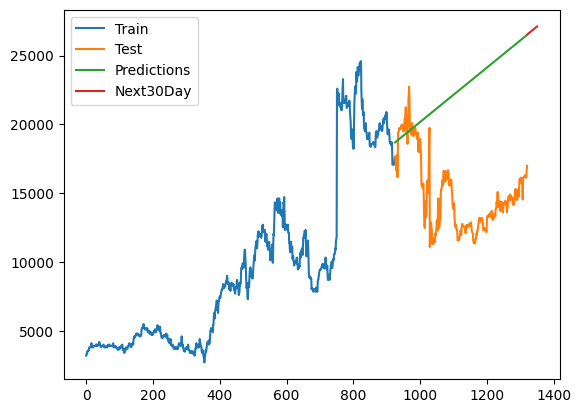

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DHT Historical Data

In [12]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [13]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [14]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

In [15]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [17]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[26499.2960004  26519.05977889 26538.82355738 26558.58733588
 26578.35111437 26598.11489286 26617.87867135 26637.64244985
 26657.40622834 26677.17000683 26696.93378532 26716.69756381
 26736.46134231 26756.2251208  26775.98889929 26795.75267778
 26815.51645628 26835.28023477 26855.04401326 26874.80779175
 26894.57157025 26914.33534874 26934.09912723 26953.86290572
 26973.62668421 26993.39046271 27013.1542412  27032.91801969
 27052.68179818 27072.44557668]


In [18]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8750.859435309563
Testing RMSE: 8750.859435309563
Validation MAPE: 57.4231603296811
Testing MAPE: 57.4231603296811
Validation MSLE: 0.23441490493476902
Testing MSLE: 0.23441490493476902


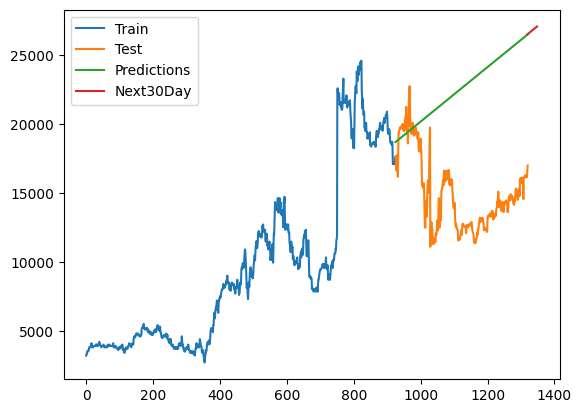

In [19]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DP3 Historical Data

In [20]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [21]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [22]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

In [23]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [25]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[23060.39854275 23080.16232124 23099.92609973 23119.68987823
 23139.45365672 23159.21743521 23178.9812137  23198.7449922
 23218.50877069 23238.27254918 23258.03632767 23277.80010616
 23297.56388466 23317.32766315 23337.09144164 23356.85522013
 23376.61899863 23396.38277712 23416.14655561 23435.9103341
 23455.67411259 23475.43789109 23495.20166958 23514.96544807
 23534.72922656 23554.49300506 23574.25678355 23594.02056204
 23613.78434053 23633.54811902]


In [26]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8750.859435309563
Testing RMSE: 8750.859435309563
Validation MAPE: 57.4231603296811
Testing MAPE: 57.4231603296811
Validation MSLE: 0.23441490493476902
Testing MSLE: 0.23441490493476902


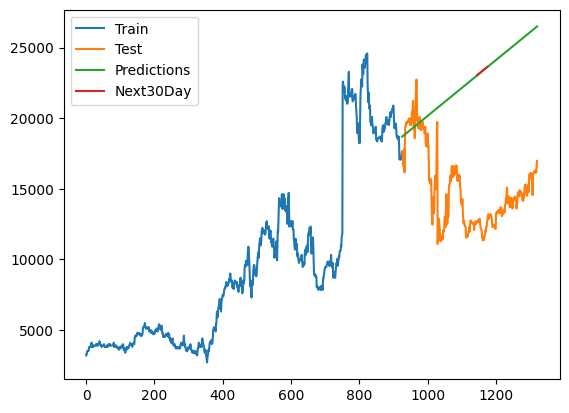

In [27]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()